# HW - Calculate the Integral

Calculate the following integral based on three different rules:

$$\int_0^3\text{e}^{(-x^2)}dx$$

In [3]:
# For the rectangle rule, (b-a)/n = base * height to calculate the area of each rectangular slices

import numpy as np
import matplotlib.pyplot as plt
from math import exp, log

plt.rcParams['figure.figsize'] = (25,20)
plt.rcParams.update({'font.size': 20})

# define function that plots the graph that takes in following parameters: 
# starting 'a' and ending points 'b' and how many slices 'n'
def Rectangle_Rule(a, b, n, plot=1):

    f = lambda x: -(x * x)
    
    # declare variables: base, height, lists that calculate each  
    base = (b - a) / n
    results_x = np.linspace(a, b, n)          # places the parameters in linear list.
    input_height = f(results_x)               # calculates height for each slices, takes in the linear space
    output_height = np.exp(input_height)      # converts height into exponential values
    area = np.empty([n], float)               # empty list for area for each base, size=n
    
    # loop to fill in indexes of area list
    for i in range(n):
        area[i] = base * output_height[i]     # calculate area for each slices
    
    # need this to show plot
    if plot == 1:
        
        # x,y axes
        x = np.linspace(a, b, n)
        input_y = -(x * x)
        output_y = np.exp(input_y)
        
        # plot the integral
        plt.plot(x, output_y, 'r')
        plt.xlabel('x')
        plt.ylabel('f(x) = ${e}^{-x^2}$')
        
        # forms each bar
        plt.bar(results_x+base/2, output_y, base, edgecolor ='black', facecolor='pink')
        plt.xlim([a,b])
        plt.title("Rectangle Rule")
    plt.show()
    print('Area using Rectangle rule: ', sum(area))


        
    return (sum(area))

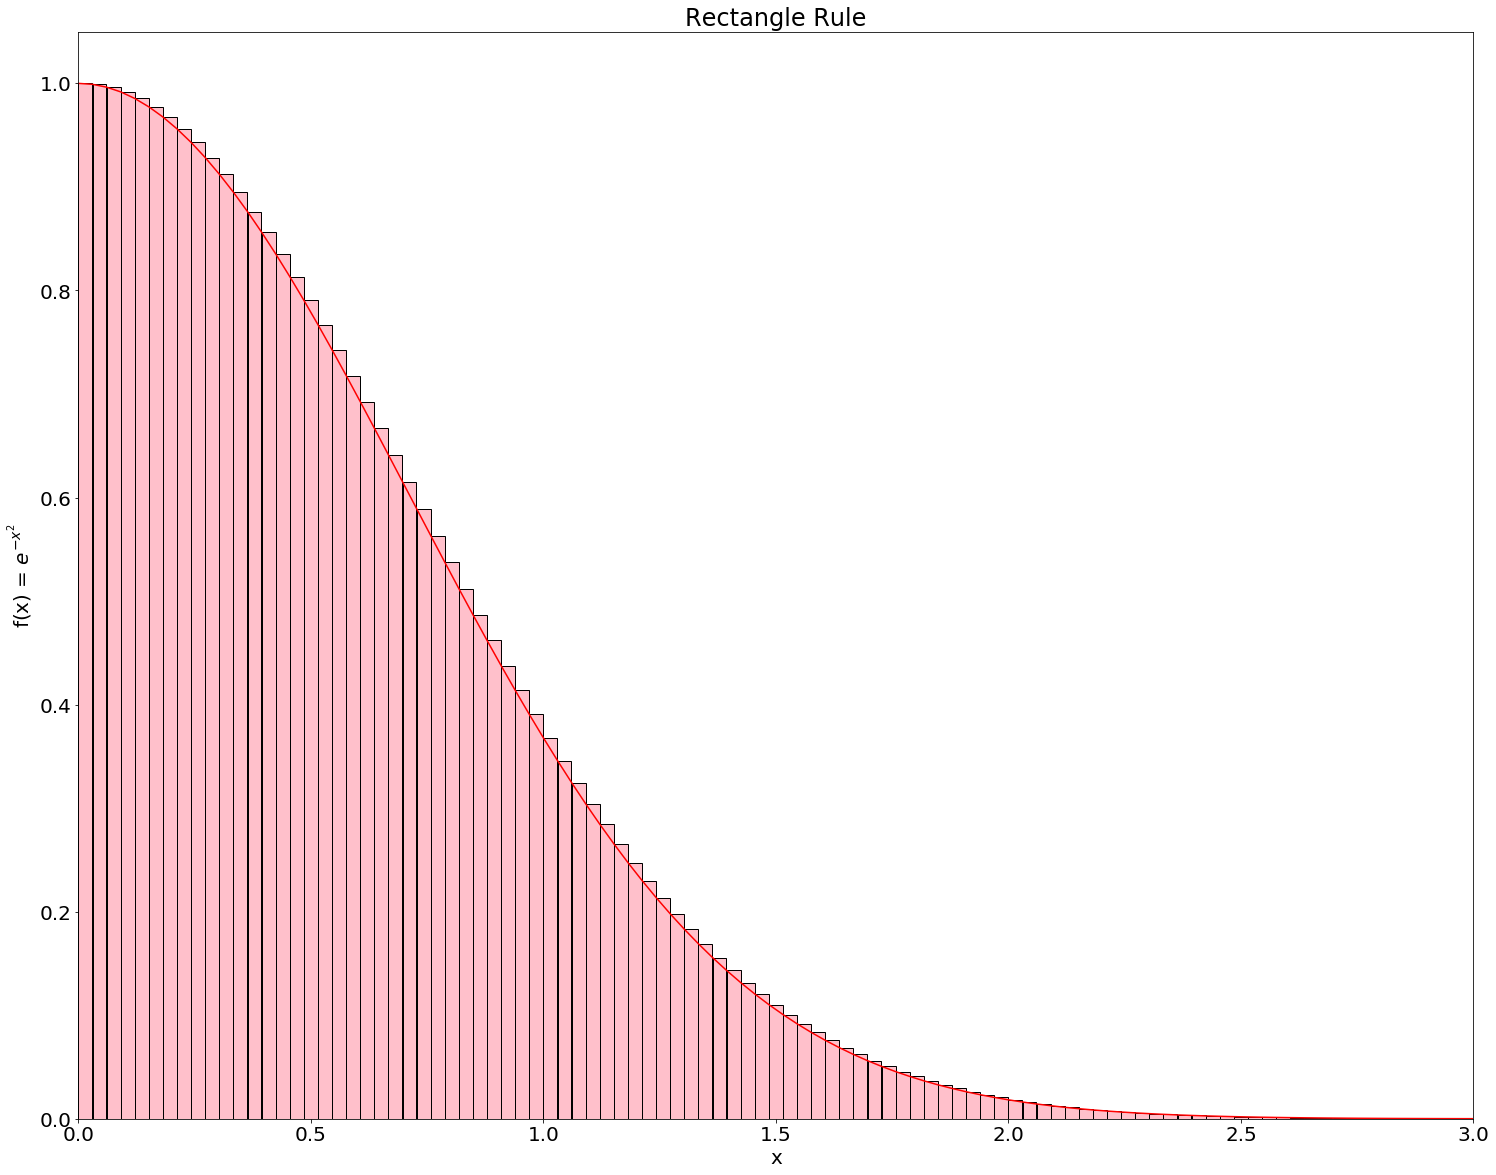

Area using Rectangle rule:  0.892347069854365


0.892347069854365

In [4]:
Rectangle_Rule(0,3,100)

In [6]:
def Trapezoidal_Rule(a, b, n, plot=1):
    
    f = lambda x: -(x * x)
    
    base = (b - a) / n
    results_x = np.linspace(a, b, n+1)
    input_height = f(results_x)
    output_height = np.exp(input_height)
    area = np.empty([n], float)
    
    for i in range(n):
        
        # adds x_i + x_i+1 and multiplies it to base/2
        area[i] = (base/2) * (output_height[i]+output_height[i+1])
        
    if plot == 1:
        
        x = np.linspace(a, b, n)
        input_y = -(x * x)
        output_y = np.exp(input_y)
        plt.plot(x, output_y, 'r')
        plt.xlabel('x')
        plt.ylabel('f(x) = ${e}^{-x^2}$')
        plt.xlim([a,b])
        y2 = np.array([0,0])

        for i in range(n):
            x0 = results_x[i:i+2]
            y1 = output_height[i:i+2]
            plt.fill_between(x0, y1, y2, where=y1>=y2, facecolor='orange')
            linex, liney = [results_x[i+1], results_x[i+1]], [0, output_height[i+1]]
            plt.plot(linex, liney, color='black', linewidth=2.0)
            plt.title("Trapezoidal Rule")
        plt.show()
        print('Area using Trapezoidal rule: ', sum(area))
            
    
    return sum(area)
        
        

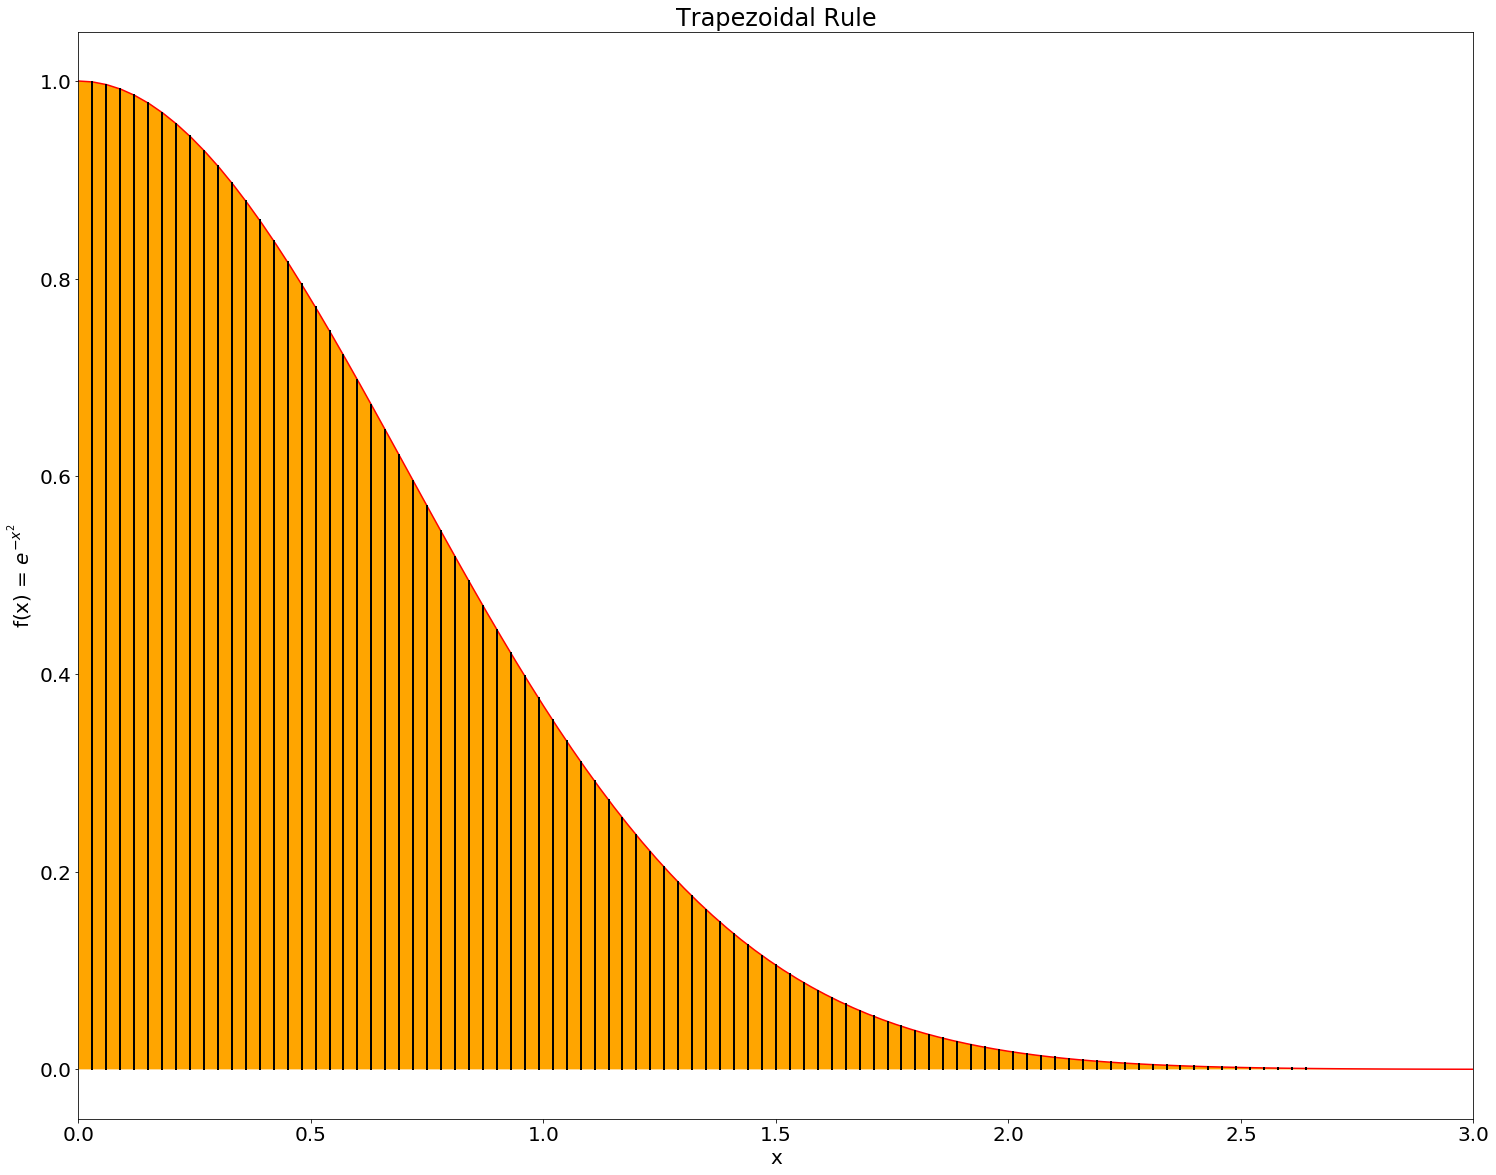

Area using Trapezoidal rule:  0.8862072927500886


0.8862072927500886

In [7]:
Trapezoidal_Rule(0,3,100)

In [8]:
def Simpson_Rule(a, b, n, plot=1):

    f = lambda x: -(x * x)

    base = (b - a) / n
    results_x = np.linspace(a, b, n+1)
    input_height = f(results_x)
    output_height = np.exp(input_height)
    area = np.empty([n+1], float)
    
    for i in range(n+1):
        
        # determines coefficients for each ith entry
        if i == 0 or i == n:
            coef = 1/3               # if i is the first and last then coef=1/3
        elif i%2 == 1:
            coef = 4/3               # if i is divisible by 2 then coef=4/3
        else: 
            coef = 2/3               # else if i is odd then coef=2/3
            
        area[i] = coef*output_height[i]*base
                
    if plot == 1:
        
        x = np.linspace(a, b, n)
        input_y = -(x * x)
        output_y = np.exp(input_y)
        plt.plot(x, output_y, 'r')
        plt.xlabel('x')
        plt.ylabel('f(x) = ${e}^{-x^2}$')
        plt.xlim([a,b])
        y2 = np.array([0,0])
        
        for i in range(n):
            
            x0 = results_x[i:i+2]
            y1 = output_height[i:i+2]
            plt.fill_between(x0, y1, y2, where=y1>=y2, facecolor='yellow')
            linex, liney = [results_x[i+1], results_x[i+1]], [0, output_height[i+1]]
            plt.plot(linex, liney, color='black', linewidth=2.0)
            plt.title("Simpson's Rule")
        plt.show
        print("Area using Simpson's rule: ", sum(area))


            
    return sum(area)

Area using Simpson's rule:  0.8862073481597857


0.8862073481597857

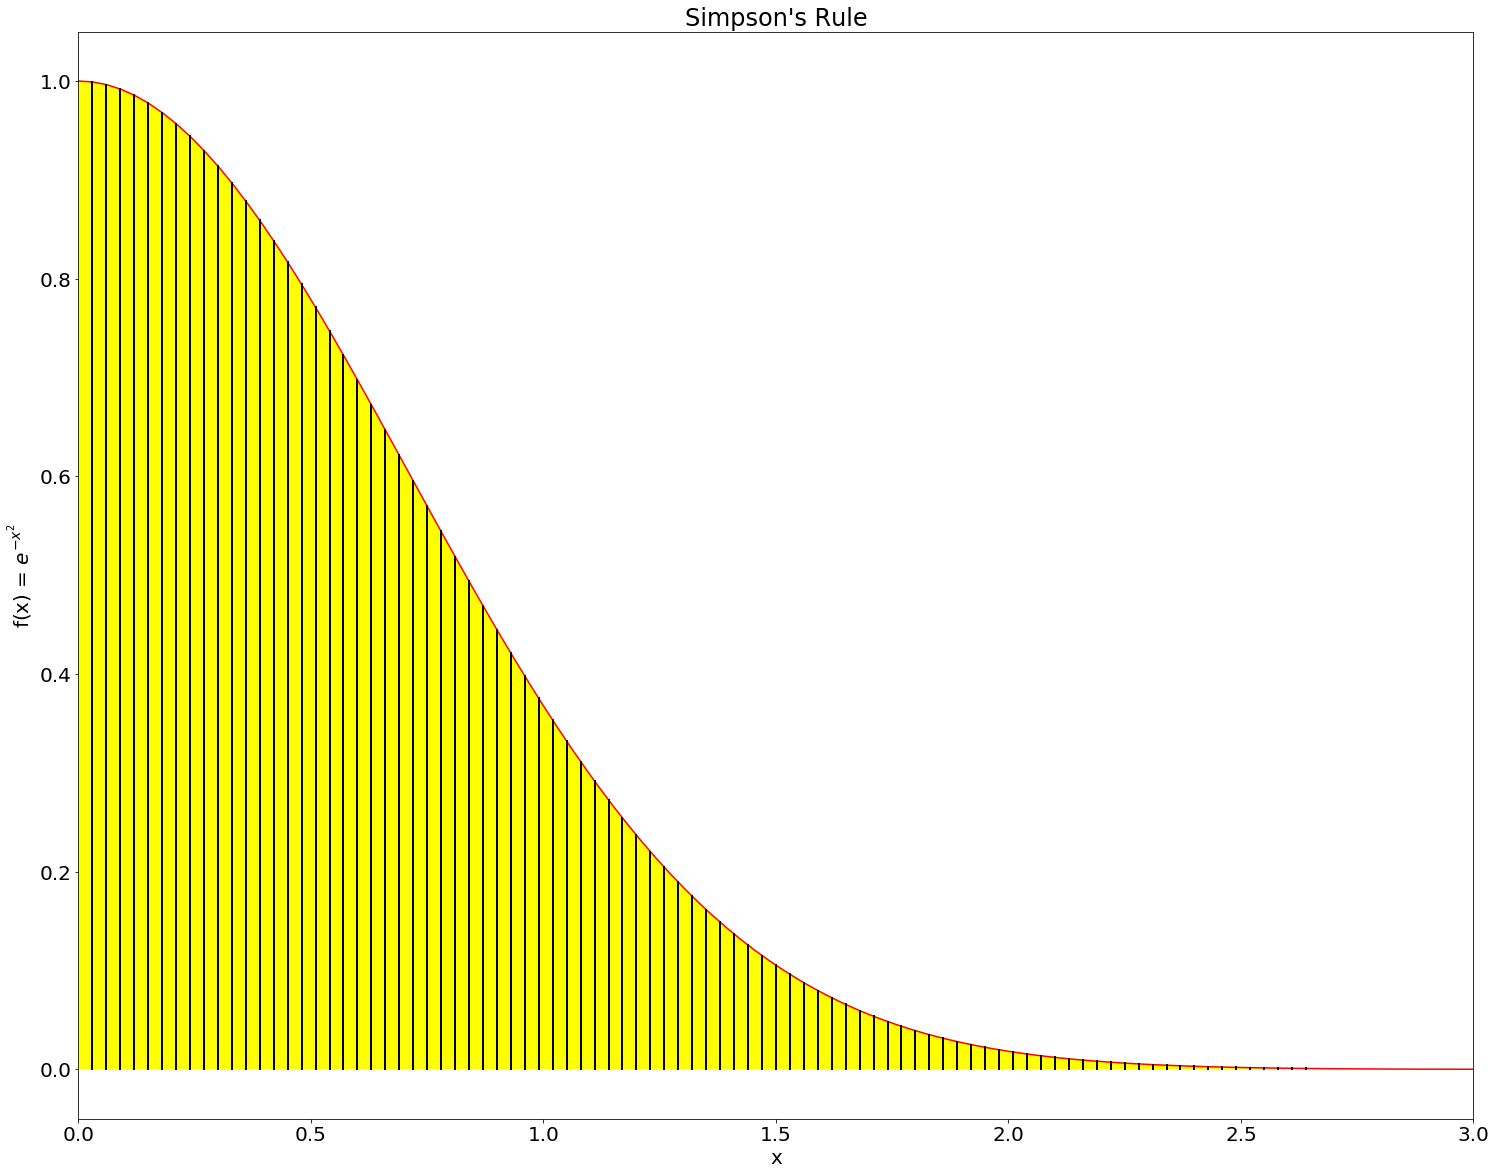

In [10]:
Simpson_Rule(0,3,100)